In [4]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import splitfolders

splitfolders.ratio("data/training", output="data/datasets",
    seed=42, ratio=(.7, .1, .2), group_prefix=None, move=False)

In [9]:
IMAGE_SIZE = 256
CHANNELS = 3

train_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    horizontal_flip = True,
    rotation_range = 10    
)

train_generator = train_datagen.flow_from_directory(
    'data/datasets/train',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse'
)

Found 1506 images belonging to 3 classes.


In [10]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break
    

[[[0.7335562  0.7100268  0.71786994]
  [0.7254902  0.7019608  0.70980394]
  [0.7291878  0.7056584  0.7135015 ]
  ...
  [0.80752444 0.78399503 0.79183817]
  [0.80937934 0.7858499  0.79369307]
  [0.80929893 0.7857695  0.79361266]]

 [[0.73367685 0.71014744 0.7179906 ]
  [0.7254902  0.7019608  0.70980394]
  [0.7290671  0.7055377  0.7133808 ]
  ...
  [0.8004648  0.7769354  0.78477854]
  [0.80034417 0.77681476 0.7846579 ]
  [0.80022347 0.77669406 0.7845372 ]]

 [[0.7244451  0.7009157  0.70875883]
  [0.72156245 0.69803303 0.7058762 ]
  [0.72977525 0.70624584 0.714089  ]
  ...
  [0.7898528  0.7663234  0.7741665 ]
  [0.78977233 0.7662429  0.77408606]
  [0.7896919  0.7661625  0.77400565]]

 ...

 [[0.6092998  0.5661625  0.5818488 ]
  [0.6093802  0.56624293 0.5819292 ]
  [0.6290504  0.5859131  0.6015994 ]
  ...
  [0.58546096 0.5423237  0.5658531 ]
  [0.60879385 0.56565654 0.58918595]
  [0.5809288  0.53779155 0.56132096]]

 [[0.5284101  0.48527282 0.5009591 ]
  [0.52716327 0.48402596 0.49971223]


In [11]:
validation_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    horizontal_flip = True,
    rotation_range = 10    
)

validation_generator = validation_datagen.flow_from_directory(
    'data/datasets/val',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse'
)

Found 215 images belonging to 3 classes.


In [12]:
test_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    horizontal_flip = True,
    rotation_range = 10    
)

test_generator = test_datagen.flow_from_directory(
    'data/datasets/test',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse'
)

Found 431 images belonging to 3 classes.


In [23]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [13]:
#NN

input_shape = [IMAGE_SIZE, IMAGE_SIZE, CHANNELS]
n_classes = 3

model = models.Sequential([
    layers.Input(input_shape),
    layers.Rescaling(1. / 255),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

2024-12-15 23:25:38.112677: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [15]:
1506/32

47.0625

In [16]:
215/32

6.71875

In [29]:
model.fit(
    train_generator,
    steps_per_epoch = 47,
    batch_size = 32,
    validation_data = validation_generator,
    validation_steps = 6,
    verbose = 1,
    epochs = 30
)

Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 366ms/step - accuracy: 0.4153 - loss: 0.9160 - val_accuracy: 0.4688 - val_loss: 0.9114
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5000 - loss: 0.9554 - val_accuracy: 0.4348 - val_loss: 0.8495
Epoch 3/30


/home/alexandr/anaconda3/envs/tens/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 357ms/step - accuracy: 0.4426 - loss: 0.9105 - val_accuracy: 0.4688 - val_loss: 0.8850
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4688 - loss: 0.9547 - val_accuracy: 0.4348 - val_loss: 1.0348
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 358ms/step - accuracy: 0.4791 - loss: 0.8968 - val_accuracy: 0.4740 - val_loss: 0.9068
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5938 - loss: 0.9777 - val_accuracy: 0.3913 - val_loss: 0.8682
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 360ms/step - accuracy: 0.4555 - loss: 0.9010 - val_accuracy: 0.4583 - val_loss: 0.8950
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4688 - loss: 0.8854 - val_accuracy: 0.5217 - val_loss: 0.9274
Epoch 9/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 360ms/step - accuracy: 0.4537 - loss: 0.9003 - val_accuracy: 0.4688 - val_loss: 0.8939
Epoch 10/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3750 - loss: 1.0050 - val_accuracy: 0.4783 - val_los

2024-12-15 23:44:52.183415: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 358ms/step - accuracy: 0.4777 - loss: 0.9082 - val_accuracy: 0.4531 - val_loss: 0.9059
Epoch 14/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6250 - loss: 0.9304 - val_accuracy: 0.5652 - val_loss: 0.8399
Epoch 15/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 356ms/step - accuracy: 0.4606 - loss: 0.8935 - val_accuracy: 0.4635 - val_loss: 0.9050
Epoch 16/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4688 - loss: 0.8260 - val_accuracy: 0.4783 - val_loss: 0.8476
Epoch 17/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 362ms/step - accuracy: 0.4587 - loss: 0.8839 - val_accuracy: 0.4688 - val_loss: 0.8972
Epoch 18/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3750 - loss: 0.8910 - val_accuracy: 0.4348 - val_loss: 0.9289
Epoch 19/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 357ms/step - accuracy: 0.4517 - loss: 0.9104 - val_accuracy: 0.4479 - val_loss: 0.9139
Epoch 20/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4062 - loss: 0.8844 - val_accuracy: 0.3913 - v

In [30]:
scores = model.evaluate(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.4740 - loss: 0.9127


In [31]:
scores

[0.9019787907600403, 0.46403712034225464]

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
predicted label: Potato___Early_blight


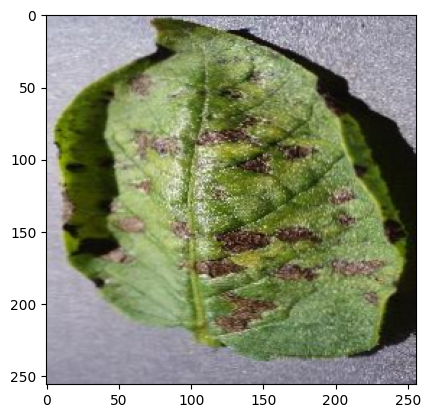

In [28]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break